#  Amazon Alexa Reviews
##   This project is to discover insights into Amazon Alexa reviews using machine learning algorithms.


## EDA & Visualizations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
%matplotlib inline

In [3]:
df=pd.read_csv('E:/spingboard/project/amazon_alexa.tsv',sep='\t')

In [4]:
print('Shape of DataFrame is {}'.format(df.shape))

Shape of DataFrame is (3150, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [6]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [7]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


#### 1. Rating 

In [9]:
totle_r=df['rating'].count()
#rating_p=[df.loc[df['rating']==1,'rating']/totle_r,df.loc[df['rating']==2,'rating']/totle_r,df.loc[df['rating']==3,'rating']/totle_r,df.loc[df['rating']==4,'rating']/totle_r,loc[df['rating']==5,'rating']/totle_r]
rating_p_1=df.loc[df['rating']==1,'rating'].count()/totle_r
rating_p_2=df.loc[df['rating']==2,'rating'].count()/totle_r
rating_p_3=df.loc[df['rating']==3,'rating'].count()/totle_r
rating_p_4=df.loc[df['rating']==4,'rating'].count()/totle_r
rating_p_5=df.loc[df['rating']==5,'rating'].count()/totle_r


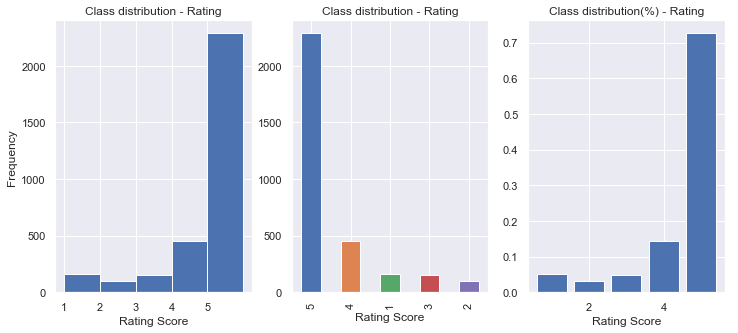

In [10]:
sns.set()
plt.figure(figsize=(12,5))
bin_edges=[1,2,3,4,5,6]

plt.subplot(1,3,1)
df['rating'].plot(kind='hist',bins=bin_edges)
plt.xticks(range(1,6))
plt.title('Class distribution - Rating')
plt.xlabel('Rating Score')

plt.subplot(1,3,2)
df['rating'].value_counts().plot(kind='bar')
plt.title('Class distribution - Rating')
plt.xlabel('Rating Score')

plt.subplot(1,3,3)
x=np.array([1,2,3,4,5])
y=np.array([rating_p_1,rating_p_2,rating_p_3,rating_p_4,rating_p_5])
plt.bar(x,y)
plt.title('Class distribution(%) - Rating')
plt.xlabel('Rating Score')

plt.show()

#### 2. Feedback 

1    2893
0     257
Name: feedback, dtype: int64


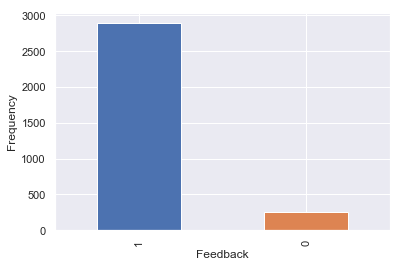

In [49]:
print(df['feedback'].value_counts())

df['feedback'].value_counts().plot(kind='bar')
plt.xlabel('Feedback')
plt.ylabel('Frequency')
plt.show()

<p><b>Analysis:</b> The result shows that most reviews are positive. So the dataset is imbalanced.</p>

In [11]:
test = df.copy(deep=True)
test.loc[test['feedback'] == 1, 'feedback'] = 'Positive'
test.loc[test['feedback'] == 0, 'feedback'] = 'Negative'


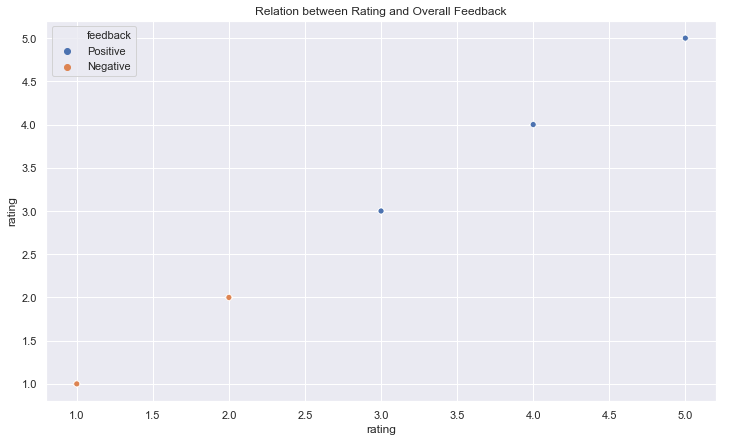

In [12]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x="rating", y="rating", hue="feedback",data=test)
plt.title("Relation between Rating and Overall Feedback");

<b>Analysis:</b>The result shows that the reviews which have rating score under 3 are negtive review, and those have rating score greater or equal to 3 are positive. 

#### 3. variation 

In [13]:
df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [14]:
df['variation'].value_counts(dropna=False)

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [15]:
def FN(x):
    AB=''
    L=x.split()    
    for c in L:        
        AB += c[0]
    return AB

In [16]:
test['Ab_variation']=[FN(x) for x in test['variation']]
print(test.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback Ab_variation  
0                                      Love my Echo!  Positive           CF  
1                                          Loved it!  Positive           CF  
2  Sometimes while playing a game, you can answer...  Positive           WF  
3  I have had a lot of fun with this thing. My 4 ...  Positive           CF  
4                                              Music  Positive           CF  


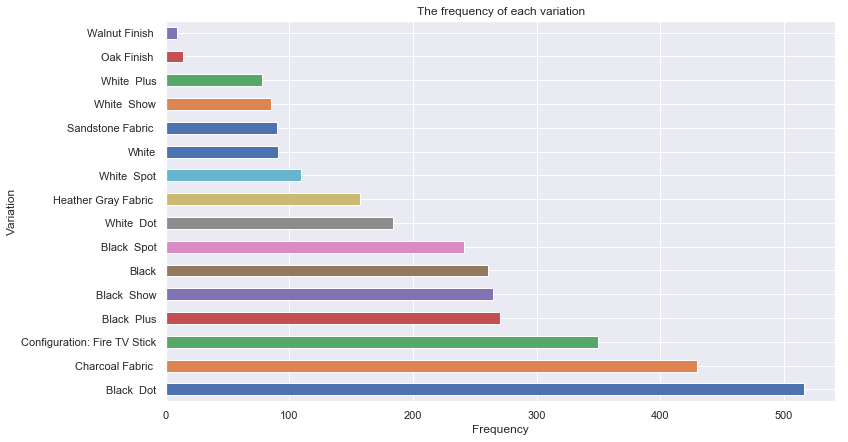

In [17]:
plt.figure(figsize=(12,7))
test['variation'].value_counts().plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Variation')
plt.title('The frequency of each variation')
plt.show()

<b>Analysis:</b> The plot shows the requency distribution of each variation of Alexa, which gives a clue what variations sell well. it is found Black Dot could be the one has the higest sale, but weather both the rating and review for it are also good need to be investigated further. Will do it next.

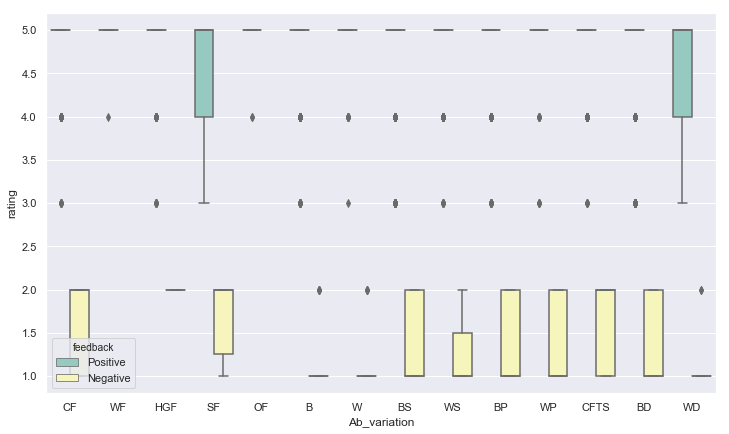

In [46]:
plt.figure(figsize=(12,7))
#fig, ax = plt.subplots(1,2)
#ax[0,0] = sns.boxplot(x="Ab_variation", y="rating",data=test, palette="Set3")
#ax[0,1] = sns.boxplot(x="Ab_variation", y="rating", hue="feedback",data=test, palette="Set3")
ax = sns.boxplot(x="Ab_variation", y="rating", hue="feedback",data=test, palette="Set3")

<b>Analysis:</b> Based on the plot, it is found that White Finish (WF), Ock Finish (OF) have no negative review and rating. Heather Gray Fabric (HGF) also has much less negative review. But as we known from the plot above, these three variations could have low sales, which could cause they have much less or no negative review. So this does not mean these three variations are more popular than the others. We need to see the sales of each variation to make conclusion.  

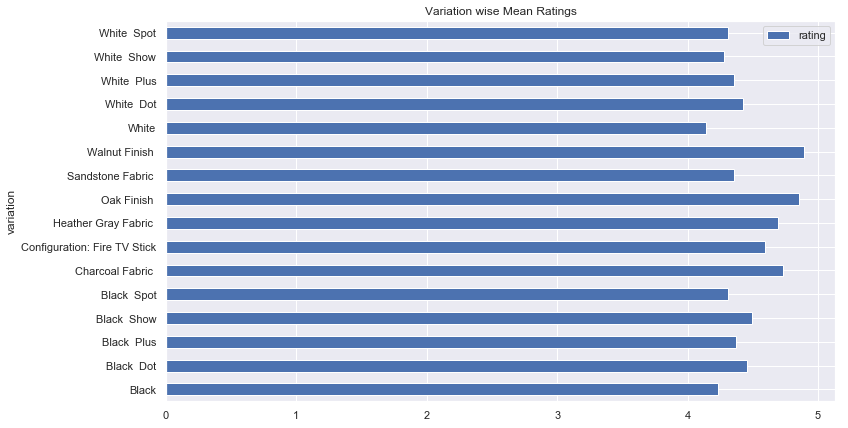

In [18]:
test.groupby('variation').mean()[['rating']].plot.barh(figsize=(12, 7))
plt.title("Variation wise Mean Ratings");

<b>Analysis:</b> Based on the comprehensive analysis of the these plots above, it is found that White Dot,Black Dot, Walnut Finish, Oak Finish, Heather Gray Fabric higher rating score. But Walnut Finish, Oak Finish, Heather Gray Fabric have small sale quantity. White Dot has higher rating score than Black Dot, but has less sale quantity than Black Dot. So based on comprehensive analysis, White Dot and Black Dot are the most popular variations.

#### 4. verified_reviews 

In [18]:
test['verified_reviews'].str.strip()
print(test['verified_reviews'].head())

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object


In [20]:
test.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
Ab_variation        0
dtype: int64

In [21]:
test.loc[test['verified_reviews']==' ','verified_reviews']='NaN'
test.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
Ab_variation        0
dtype: int64

In [22]:
test['review_length']=test['verified_reviews'].str.len()
print(test.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback Ab_variation  \
0                                      Love my Echo!  Positive           CF   
1                                          Loved it!  Positive           CF   
2  Sometimes while playing a game, you can answer...  Positive           WF   
3  I have had a lot of fun with this thing. My 4 ...  Positive           CF   
4                                              Music  Positive           CF   

   review_length  
0             13  
1              9  
2            195  
3            172  
4              5  


In [23]:
test['review_length'].describe()
pd.DataFrame(test.review_length.describe()).T

,count,mean,std,min,25%,50%,75%,max
review_length,3150.0,132.099683,182.064109,1.0,30.0,74.0,165.0,2851.0


In [24]:
test['verified_reviews'].describe()
pd.DataFrame(test.verified_reviews.describe()).T

,count,unique,top,freq
verified_reviews,3150,2301,NaN,79


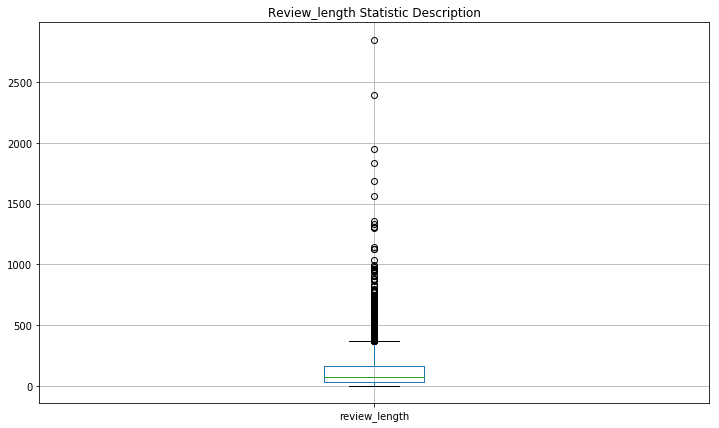

In [26]:
test.boxplot(column='review_length',figsize=(12,7))
plt.title('Review_length Statistic Description')
plt.show()

<b>Analysis:</b> Most reviews are no more than 500 words. 

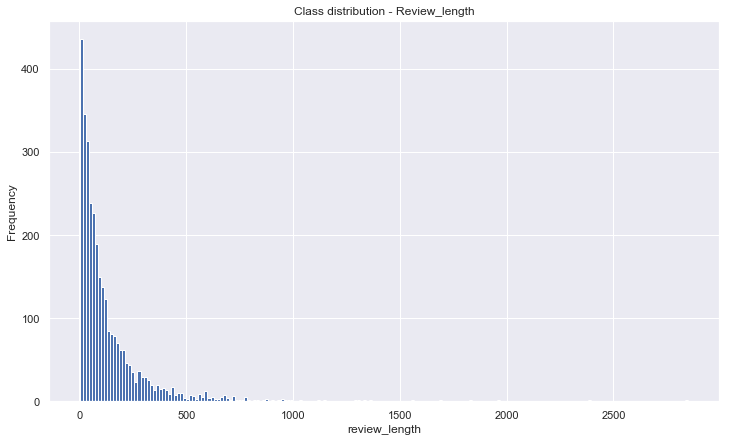

In [30]:
test['review_length'].plot(kind='hist',bins=200,figsize=(12,7))
plt.title('Class distribution - Review_length')
plt.xlabel('review_length')
plt.show()

<b>Analysis:</b> The distribution of length of review is shown with this plot. 

Text(0, 0.5, 'Mean of review_length')

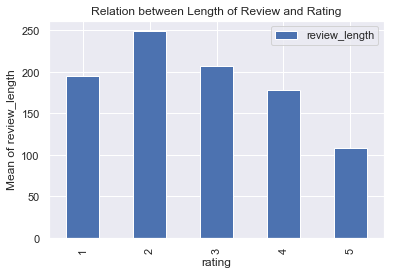

In [31]:
test2=test.groupby('rating').mean()
test2.head()
test2.plot(kind='bar',title='Relation between Length of Review and Rating')
plt.ylabel('Mean of review_length')

<b>Analysis:</b> The plot shows that reviews with 4 or 5 rating score have lower mean of length of review.  

Text(0, 0.5, 'Mean of review_length')

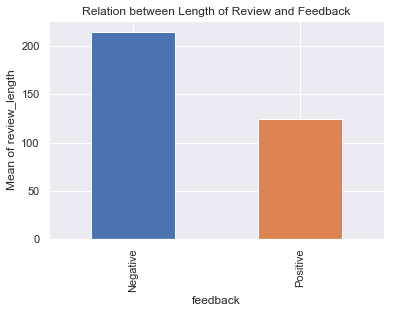

In [29]:
test3=test.groupby('feedback').mean()
test3['review_length'].plot(kind='bar',title='Relation between Length of Review and Feedback')
plt.ylabel('Mean of review_length')


<b>Analysis:</b> Negative reviews have higer average number of words for review.

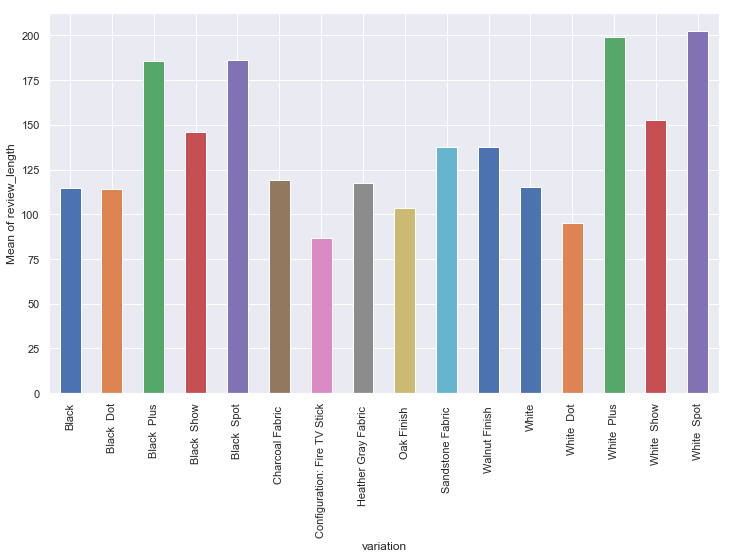

In [35]:
test4=test.groupby('variation').mean()
plt.figure(figsize=(12,7))
plt.ylabel('Mean of review_length')
test4['review_length'].plot(kind='bar')

<b>Analysis:</b> White Spot and Black Spot, White Plus and Black Plus have longer review, which could mean customers are not satisfied with them very much.

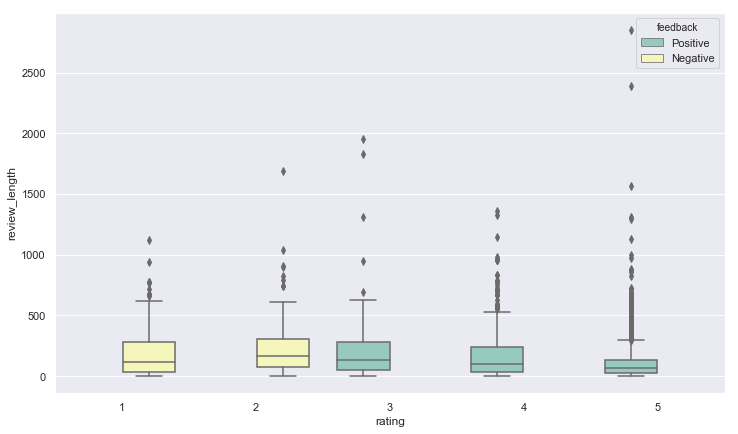

In [81]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(x="rating", y="review_length", hue="feedback",data=test, palette="Set3")

<b>Analysis:</b> It is found that the reviews with higher rating score have less review words, and vice verse.

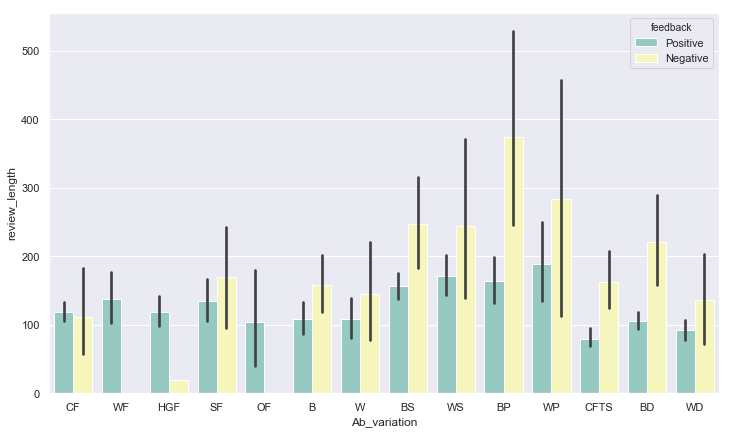

In [96]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x="Ab_variation", y="review_length", hue="feedback",data=test, palette="Set3")

<b>Analysis:</b> The plot shows negative reviews have more review words.

#### Summary
1. Basicly customers like Alexa.
2. Low level of rating tends to have long reviews. 
3. Negative feedback tends to have long reviews.
4. White Dot and Black Dot are the most popular products.
5. White Spot and Black Spot, White Plus and Black Plus might be the variations that need to be improved.

## Feature Engineering

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
df['review_length']=df['verified_reviews'].str.len()
review = df['verified_reviews']


In [34]:
review_vec = CountVectorizer()
review_X = review_vec.fit_transform(df['verified_reviews'])
review_X

<3150x4044 sparse matrix of type '<class 'numpy.int64'>'
	with 60852 stored elements in Compressed Sparse Row format>

In [12]:
pd.DataFrame(review_X.toarray(), columns=review_vec.get_feature_names())
features = pd.DataFrame(review_X.toarray(), columns=review_vec.vocabulary_)

pd.DataFrame(review_X.toarray(), columns=review_vec.get_feature_names())

,00,000,07,10,100,100x,11,1100sf,12,129,...,youtube,yr,yrs,yup,zero,zigbee,zonked,zzzz,zzzzzzz,útil
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
features = features.join(df[['review_length', 'variation']], rsuffix='_base')
features = pd.get_dummies(features)
features.columns

Index(['love', 'my', 'echo', 'loved', 'it', 'sometimes', 'while', 'playing',
       'game', 'you',
       ...
       'variation_Configuration: Fire TV Stick',
       'variation_Heather Gray Fabric ', 'variation_Oak Finish ',
       'variation_Sandstone Fabric ', 'variation_Walnut Finish ',
       'variation_White', 'variation_White  Dot', 'variation_White  Plus',
       'variation_White  Show', 'variation_White  Spot'],
      dtype='object', length=4078)

In [10]:
features.corr()

,love,my,echo,loved,it,sometimes,while,playing,game,you,...,variation_Configuration: Fire TV Stick,variation_Heather Gray Fabric,variation_Oak Finish,variation_Sandstone Fabric,variation_Walnut Finish,variation_White,variation_White Dot,variation_White Plus,variation_White Show,variation_White Spot
love,1.000000,-0.000635,-0.000635,0.097669,-0.002339,-0.000635,-0.000899,-0.000899,-0.000635,-0.000635,...,-0.012607,-0.008167,-0.002382,-0.006115,-0.001909,0.047072,-0.008881,-0.005682,-0.005938,-0.006751
my,-0.000635,1.000000,-0.000318,-0.001337,-0.001169,-0.000318,-0.000449,-0.000449,-0.000318,-0.000318,...,-0.006300,-0.004081,-0.001191,-0.003056,-0.000954,-0.003074,-0.004439,0.111835,-0.002968,-0.003374
echo,-0.000635,-0.000318,1.000000,-0.001337,-0.001169,-0.000318,-0.000449,-0.000449,-0.000318,-0.000318,...,-0.006300,-0.004081,-0.001191,-0.003056,-0.000954,-0.003074,-0.004439,-0.002840,-0.002968,-0.003374
loved,0.097669,-0.001337,-0.001337,1.000000,0.036104,-0.001337,-0.001892,-0.001892,-0.001337,-0.001337,...,-0.026532,0.015655,-0.005014,-0.012870,-0.004017,0.051062,0.072733,-0.011958,-0.012497,-0.014208
it,-0.002339,-0.001169,-0.001169,0.036104,1.000000,-0.001169,-0.001654,-0.001654,-0.001169,-0.001169,...,-0.011598,0.018471,-0.004383,-0.011251,-0.003512,-0.011316,-0.016341,0.059909,-0.010925,-0.012421
sometimes,-0.000635,-0.000318,-0.000318,-0.001337,-0.001169,1.000000,-0.000449,-0.000449,-0.000318,-0.000318,...,0.050403,-0.004081,-0.001191,-0.003056,-0.000954,-0.003074,-0.004439,-0.002840,-0.002968,-0.003374
while,-0.000899,-0.000449,-0.000449,-0.001892,-0.001654,-0.000449,1.000000,-0.000635,-0.000449,-0.000449,...,-0.008912,-0.005773,-0.001684,-0.004323,-0.001349,-0.004347,0.101199,-0.004016,-0.004198,-0.004772
playing,-0.000899,-0.000449,-0.000449,-0.001892,-0.001654,-0.000449,-0.000635,1.000000,-0.000449,-0.000449,...,-0.008912,-0.005773,-0.001684,-0.004323,-0.001349,-0.004347,-0.006278,-0.004016,-0.004198,-0.004772
game,-0.000635,-0.000318,-0.000318,-0.001337,-0.001169,-0.000318,-0.000449,-0.000449,1.000000,-0.000318,...,-0.006300,-0.004081,-0.001191,-0.003056,-0.000954,-0.003074,-0.004439,-0.002840,-0.002968,-0.003374
you,-0.000635,-0.000318,-0.000318,-0.001337,-0.001169,-0.000318,-0.000449,-0.000449,-0.000318,1.000000,...,-0.006300,-0.004081,-0.001191,-0.003056,-0.000954,-0.003074,-0.004439,-0.002840,0.107009,-0.003374


In [10]:
target = df[['feedback']].astype(int)


### Machine Learning Model

> RandomForestCLassifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [13]:
model = RandomForestClassifier()

In [14]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv_object = StratifiedKFold(n_splits=5)

grid = GridSearchCV(estimator=model, param_grid=params, cv=cv_object, verbose=0, return_train_score=True)
grid.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'bootstrap': [True], 'max_depth': [80, 100], 'min_samples_split': [8, 12], 'n_estimators': [100, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [16]:
pd.crosstab(y_train['feedback'], grid.predict(x_train), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,153,57,210
1,0,2310,2310
All,153,2367,2520


In [17]:
print("Mean Cross Validation Accuracy - Train Set : {}".format(grid.cv_results_['mean_train_score'].mean()*100))
print("="*70)
print("Mean Cross Validation Accuracy - Validation Set : {}".format(grid.cv_results_['mean_test_score'].mean()*100))

Mean Cross Validation Accuracy - Train Set : 97.23090277777779
Mean Cross Validation Accuracy - Validation Set : 92.55456349206351


In [18]:
feature_imp_df = pd.DataFrame([grid.best_estimator_.feature_importances_], columns=list(x_train.columns)).T
feature_imp_df.columns = ['imp']
feature_imp_df.sort_values('imp', ascending=False, inplace=True)

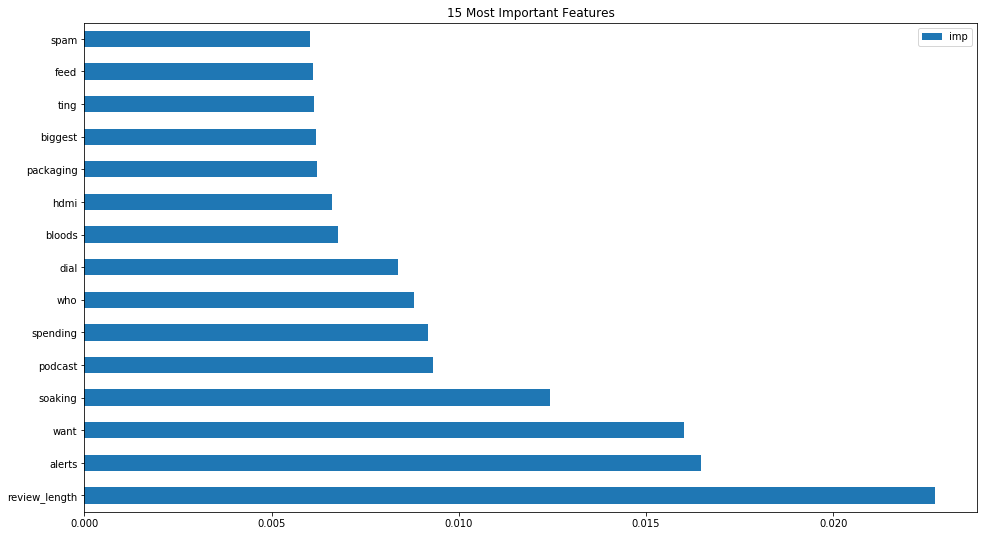

In [19]:
feature_imp_df.head(15).plot.barh(figsize=(16, 9))
plt.title("15 Most Important Features");

> LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'train_test_split' is not defined

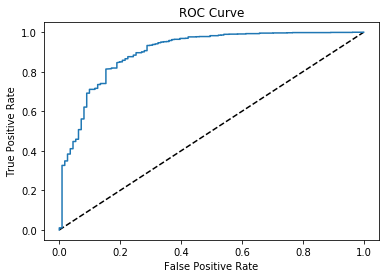

In [25]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, threshods = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [1]:
# using Cross Validation


c_space = np.logspace(-5, 8, 15)
param_grid_inst = {'C': c_space}
logreg_cv = GridSearchCV(logreg, param_grid_inst, cv=5)
logreg_cv.fit(X_train, y_train.values.ravel())

NameError: name 'np' is not defined

In [35]:
pd.crosstab(y_train['feedback'], grid.predict(X_train), rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,91,55,146
1,0,1744,1744
All,91,1799,1890


In [ ]:
print("Mean Cross Validation Accuracy - Train Set : {}".format(logreg_cv.cv_results_['mean_train_score'].mean()*100))
print("="*70)
print("Mean Cross Validation Accuracy - Validation Set : {}".format(logreg_cv.cv_results_['mean_test_score'].mean()*100))

In [38]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.9365079365079365
